In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

df1 = pd.read_csv('df1_loan.csv')
df1.head()

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,$5849.0
1,1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,$6091.0
2,2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,$3000.0
3,3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,$4941.0
4,4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,$6000.0


In [2]:
df1.shape

(500, 15)

In [3]:
df1.describe()

,Unnamed: 0,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,500.000000,500.000000,500.000000,482.000000,486.000000,459.000000
mean,249.500000,5493.644000,1506.307840,144.020747,342.543210,0.843137
std,144.481833,6515.668972,2134.432188,82.344919,63.834977,0.364068
min,0.000000,150.000000,0.000000,17.000000,12.000000,0.000000
25%,124.750000,2874.500000,0.000000,100.000000,360.000000,1.000000
50%,249.500000,3854.000000,1125.500000,126.500000,360.000000,1.000000
75%,374.250000,5764.000000,2253.250000,161.500000,360.000000,1.000000
max,499.000000,81000.000000,20000.000000,700.000000,480.000000,1.000000


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         500 non-null    int64  
 1   Loan_ID            500 non-null    object 
 2   Gender             491 non-null    object 
 3   Married            497 non-null    object 
 4   Dependents         488 non-null    object 
 5   Education          500 non-null    object 
 6   Self_Employed      473 non-null    object 
 7   ApplicantIncome    500 non-null    int64  
 8   CoapplicantIncome  500 non-null    float64
 9   LoanAmount         482 non-null    float64
 10  Loan_Amount_Term   486 non-null    float64
 11  Credit_History     459 non-null    float64
 12  Property_Area      500 non-null    object 
 13  Loan_Status        500 non-null    object 
 14  Total_Income       500 non-null    object 
dtypes: float64(4), int64(2), object(9)
memory usage: 58.7+ KB


In [5]:
df1 = df1.drop('ApplicantIncome',1).drop('CoapplicantIncome',1).drop('Loan_ID',1).drop('Married',1).drop('Education',1)

df1['Total_Income'] = df1['Total_Income'].astype('str')
df1['Total_Income'] = df1['Total_Income'].str.replace('$','')
df1['Total_Income'] = df1['Total_Income'].astype('float')
df1['Dependents'] = df1['Dependents'].astype('str')
df1['Dependents'] = df1['Dependents'].str.replace('+','')
df1['Dependents'] = df1['Dependents'].astype('float')

df1=df1.dropna()
df1.head()

C:\Users\20nis\AppData\Local\Temp\ipykernel_23144\3649710120.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df1 = df1.drop('ApplicantIncome',1).drop('CoapplicantIncome',1).drop('Loan_ID',1).drop('Married',1).drop('Education',1)
C:\Users\20nis\AppData\Local\Temp\ipykernel_23144\3649710120.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df1 = df1.drop('ApplicantIncome',1).drop('CoapplicantIncome',1).drop('Loan_ID',1).drop('Married',1).drop('Education',1)
C:\Users\20nis\AppData\Local\Temp\ipykernel_23144\3649710120.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df1 = df1.drop('ApplicantIncome',1).drop('CoapplicantIncome',1).drop('Loan_ID',1).drop('Married',1).drop('Education',1)
C:\Users\20nis\AppData\Local\Temp\ipy

,Unnamed: 0,Gender,Dependents,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
1,1,Male,1.0,No,128.0,360.0,1.0,Rural,N,6091.0
2,2,Male,0.0,Yes,66.0,360.0,1.0,Urban,Y,3000.0
3,3,Male,0.0,No,120.0,360.0,1.0,Urban,Y,4941.0
4,4,Male,0.0,No,141.0,360.0,1.0,Urban,Y,6000.0
5,5,Male,2.0,Yes,267.0,360.0,1.0,Urban,Y,9613.0


In [6]:
df1.loc[df1.duplicated()]

,Unnamed: 0,Gender,Dependents,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income


C:\Users\20nis\AppData\Local\Temp\ipykernel_23144\1297319065.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1.Total_Income)


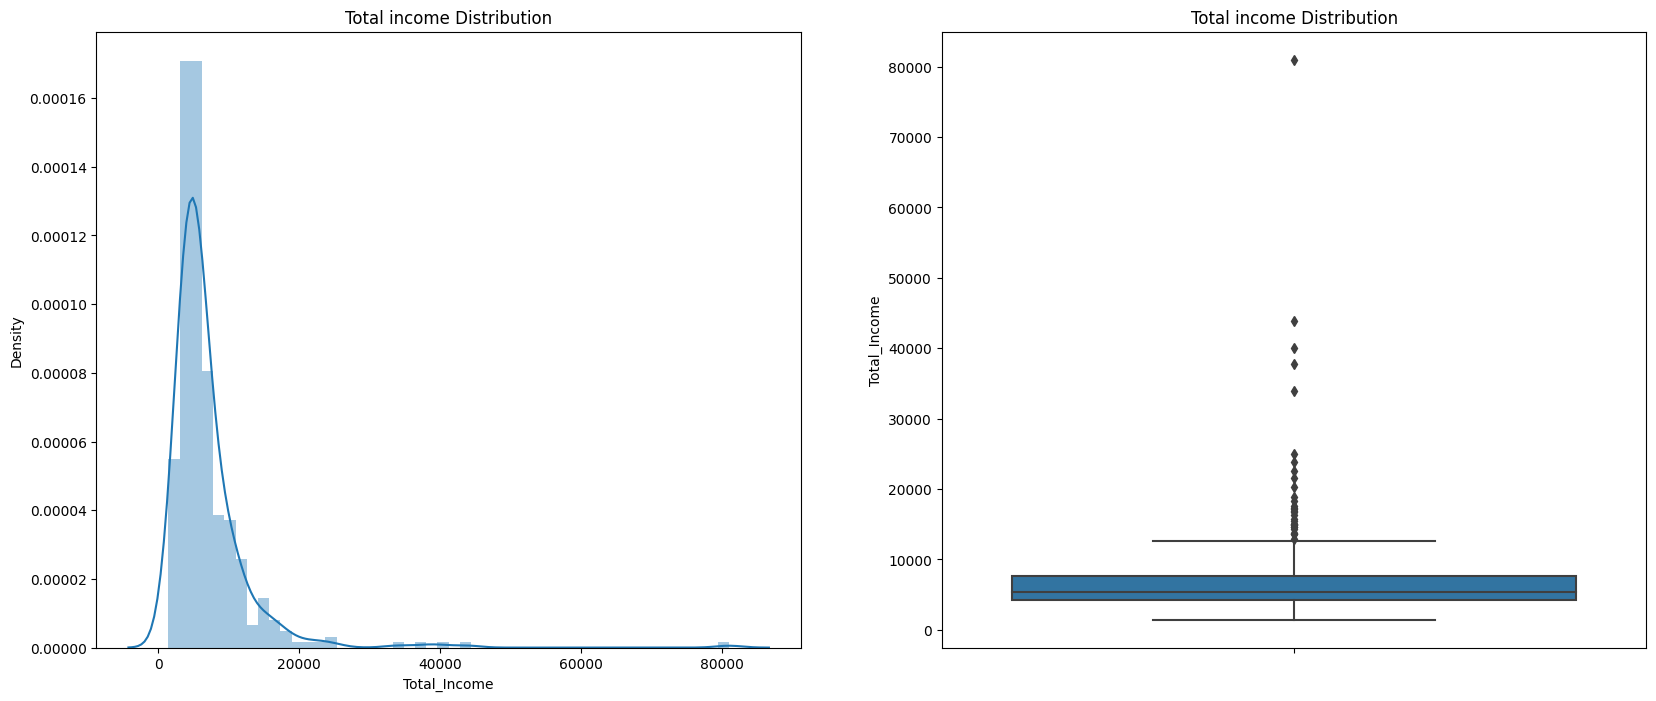

In [12]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Total income Distribution')
sns.distplot(df1.Total_Income)

plt.subplot(1,2,2)
plt.title('Total income Distribution')
sns.boxplot(y=df1.Total_Income)

plt.show()

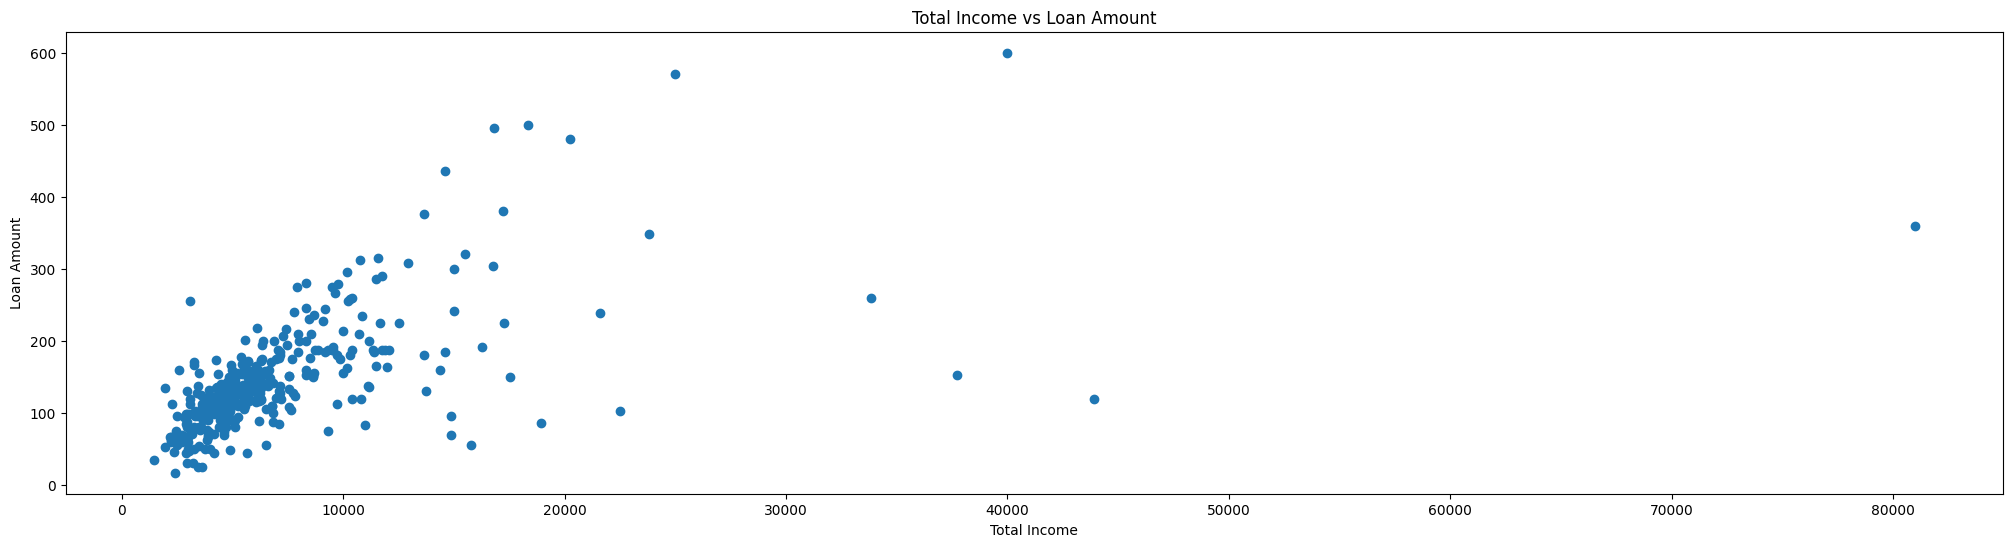

In [11]:
plt.figure(figsize=(25, 6))

plt.scatter(df1['Total_Income'],df1['LoanAmount'])
plt.xlabel('Total Income')
plt.ylabel('Loan Amount')
plt.title('Total Income vs Loan Amount')
plt.show()

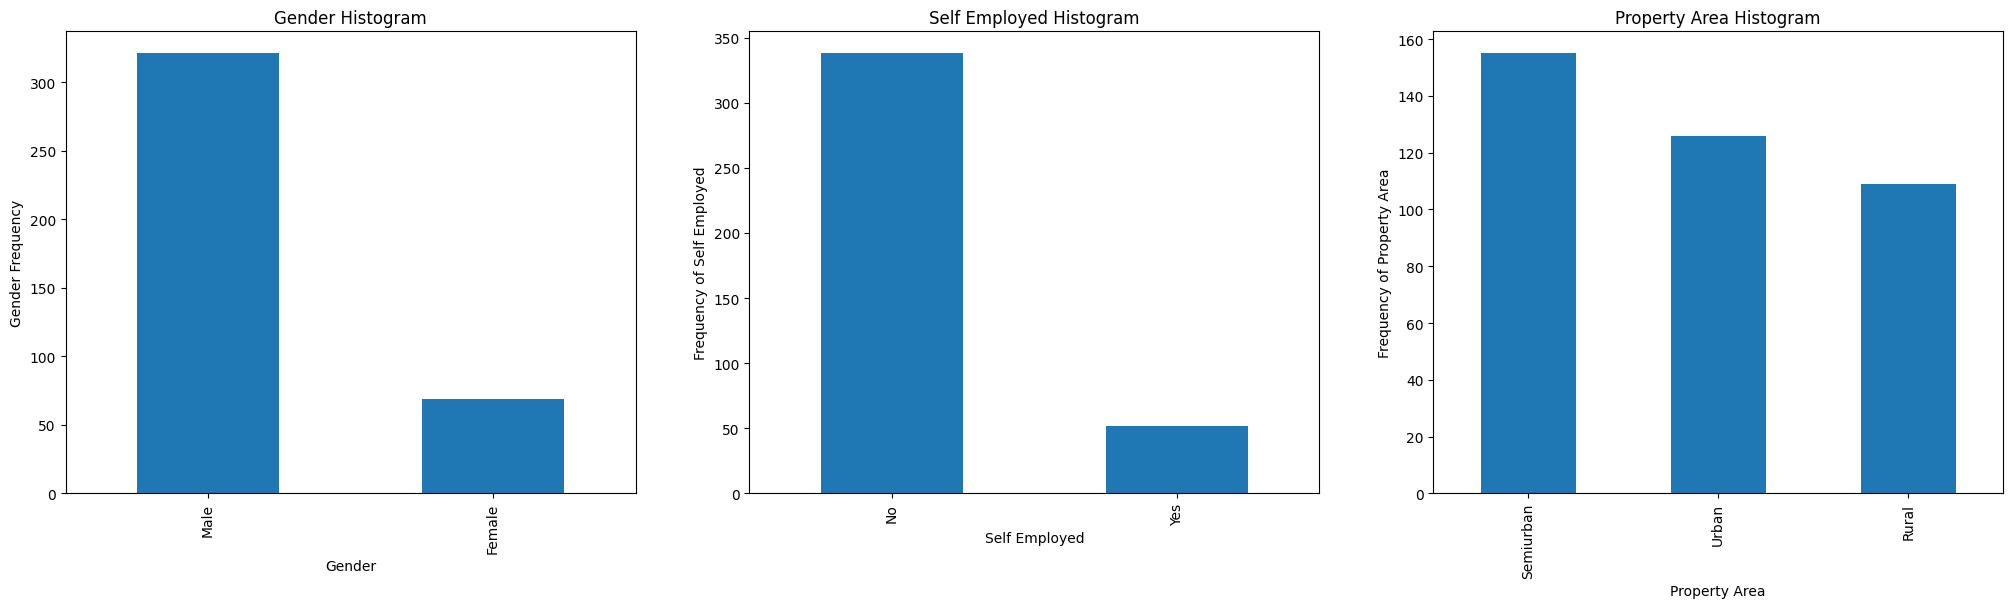

In [14]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = df1.Gender.value_counts().plot(kind = 'bar')
plt.title('Gender Histogram')
plt1.set(xlabel = 'Gender', ylabel='Gender Frequency')

plt.subplot(1,3,2)
plt1 = df1.Self_Employed.value_counts().plot(kind = 'bar')
plt.title('Self Employed Histogram')
plt1.set(xlabel = 'Self Employed', ylabel='Frequency of Self Employed')

plt.subplot(1,3,3)
plt1 = df1.Property_Area.value_counts().plot(kind = 'bar')
plt.title('Property Area Histogram')
plt1.set(xlabel = 'Property Area', ylabel='Frequency of Property Area')

plt.show()

In [15]:
X = df1[['Gender','Dependents','Self_Employed','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area','Total_Income']].values
y = df1['Loan_Status'].values
le_gender = preprocessing.LabelEncoder()
le_gender.fit(['Male','Female'])
X[:,0] = le_gender.transform(X[:,0])

le_self = preprocessing.LabelEncoder()
le_self.fit(['Yes','No'])
X[:,2] = le_self.transform(X[:,2])

le_prop = preprocessing.LabelEncoder()
le_prop.fit(['Urban','Rural','Semiurban'])
X[:,6] = le_prop.transform(X[:,6])

le_loan = preprocessing.LabelEncoder()
le_loan.fit(['Y','N'])
y= le_loan.transform(y)
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (312, 8) (312,)
Test set: (78, 8) (78,)


In [16]:
Ks = 10
mean_acc = np.zeros(Ks-1)
std_acc = np.zeros(Ks-1)
k =1
for i in range (1,Ks):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat1 = neigh.predict(X_test)
    mean_acc[i-1]= metrics.accuracy_score(y_test,yhat1)
    std_acc[i-1]=np.std(yhat1==y_test)/np.sqrt(yhat1.shape[0])
    if i>1 and (mean_acc[i-1]>mean_acc[i-2]):
        k=i-1
    else:
        k=i-2
print('Best k: ',k)
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhatknn = neigh.predict(X_test)
print("KNN")
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhatknn))

JS = jaccard_score(y_test,yhatknn)
print('Jaccard Score: ',JS)
print('F1 Score: ',f1_score(y_test,yhatknn))
print('Log Loss: ',log_loss(y_test,yhatknn))

Best k:  7
KNN
Train set Accuracy:  0.8205128205128205
Test set Accuracy:  0.7948717948717948
Jaccard Score:  0.75
F1 Score:  0.8571428571428571
Log Loss:  7.085010475450815


Decision Tree Classifier
Acc Score :  0.7435897435897436


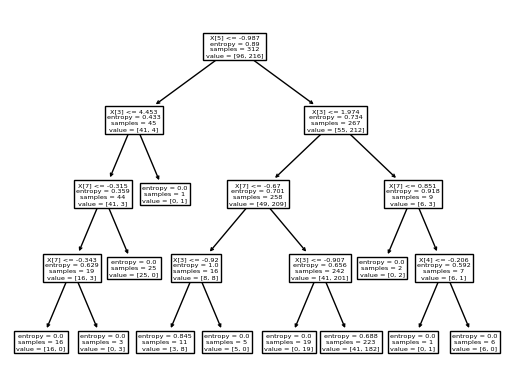

Jaccard Score:  0.7014925373134329
F1 Score:  0.8245614035087719
Log Loss:  8.856260531501242


In [17]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import sklearn.tree as tree

drug = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4)
drug = drug.fit(X_train,y_train)
drugtree = drug.predict(X_test)
print("Decision Tree Classifier")

print('Acc Score : ', metrics.accuracy_score(y_test, drugtree))
tree.plot_tree(drug)
plt.show()

print('Jaccard Score: ',jaccard_score(y_test,drugtree))
print('F1 Score: ',f1_score(y_test,drugtree))
print('Log Loss: ',log_loss(y_test,drugtree))

In [19]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(C=1, solver = 'liblinear').fit(X_train,y_train)
yhatlr = LR.predict(X_test)
yhatlr_prob = LR.predict_proba(X_test)
print("Logistic Regression")
print('Jaccard Score: ',jaccard_score(y_test,yhatlr,pos_label = 1))
print('F1 Score: ',f1_score(y_test,yhatlr))
print('Log Loss: ',log_loss(y_test,yhatlr_prob))

Logistic Regression
Jaccard Score:  0.7424242424242424
F1 Score:  0.8521739130434782
Log Loss:  0.5373123447420294


In [20]:
from sklearn import svm
model = svm.SVC(kernel = 'rbf')
model.fit(X_train,y_train)

yhatsvm = model.predict(X_test)
print("SVM")
print('Jaccard Score: ',jaccard_score(y_test,yhatsvm))
print('F1 Score: ',f1_score(y_test,yhatsvm))
print('Log Loss: ',log_loss(y_test,yhatsvm))

SVM
Jaccard Score:  0.7384615384615385
F1 Score:  0.8495575221238938
Log Loss:  7.527825552275699
